<a href="https://colab.research.google.com/github/julianj98/ProyectoDS_ParteI_Juarez/blob/main/ProyectoDS_ParteI_Juarez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CASO: ¿que planeta es el mejor candidato para ser un mundo habitable?
este dataset corresponde al registro de planetas conocidos por la nasa.

Lo recolecte en: https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PSCompPars

El diccionario de datos se encuentra en: https://exoplanetarchive.ipac.caltech.edu/docs/API_PS_columns.html


mis preguntas para este dataset son:
- 1-¿cuales serian en base a estas variables los potenciales planetas?
- 2-¿a que distancia se encuentran?
- 3-¿cual tiene la mejor probabilidad en base a eso y distancia?


# This file was produced by the NASA Exoplanet Archive  http://exoplanetarchive.ipac.caltech.edu (usaremos este con nombre Data3)

columnas y su descripcion:

COLUMN pl_name:        Planet Name  - cualitativa

COLUMN hostname:       Host Name  - cualitativa

COLUMN sy_snum:        Number of Stars  - cuantitativa

COLUMN sy_pnum:        Number of Planets  - cuantitativa

COLUMN discoverymethod: Discovery Method  - cualitativa

COLUMN disc_year:      Discovery Year  - cuantitativa

 COLUMN disc_facility:  Discovery Facility  - cualitativa

 COLUMN pl_controv_flag: Controversial Flag  - cuantitativa

 COLUMN pl_orbper:      Orbital Period [days]  - cuantitativa

 COLUMN pl_orbsmax:     Orbit Semi-Major Axis [au]  - cuantitativa

 COLUMN pl_rade:        Planet Radius [Earth Radius]  - cuantitativa

 COLUMN pl_radj:        Planet Radius [Jupiter Radius]  - cuantitativa

 COLUMN pl_bmasse:      Planet Mass or Mass*sin(i) [Earth Mass]  - cuantitativa

 COLUMN pl_bmassj:      Planet Mass or Mass*sin(i) [Jupiter Mass]  - cuantitativa

 COLUMN pl_bmassprov:   Planet Mass or Mass*sin(i) Provenance  - cualitativa

 COLUMN pl_orbeccen:    Eccentricity  - cuantitativa

 COLUMN pl_insol:       Insolation Flux [Earth Flux]  - cuantitativa

 COLUMN pl_eqt:         Equilibrium Temperature [K]  - cuantitativa

 COLUMN ttv_flag:       Data show Transit Timing Variations  - cuantitativa

 COLUMN st_spectype:    Spectral Type  - cuantitativa

 COLUMN st_teff:        Stellar Effective Temperature [K]  - cuantitativa

 COLUMN st_rad:         Stellar Radius [Solar Radius]  - cuantitativa

 COLUMN st_mass:        Stellar Mass [Solar mass]  - cuantitativa

 COLUMN st_met:         Stellar Metallicity [dex]  - cuantitativa

 COLUMN st_metratio:    Stellar Metallicity Ratio  - cualitativa

 COLUMN st_logg:        Stellar Surface Gravity [log10(cm/s**2)]  - cuantitativa

 COLUMN rastr:          RA [sexagesimal]  - cuantitativa

 COLUMN ra:             RA [deg]  - cuantitativa

 COLUMN decstr:         Dec [sexagesimal]  - cuantitativa

 COLUMN dec:            Dec [deg]  - cuantitativa

 COLUMN sy_dist:        Distance [pc]  - cuantitativa

 COLUMN sy_vmag:        V (Johnson) Magnitude  - cuantitativa

 COLUMN sy_kmag:        Ks (2MASS) Magnitude  - cuantitativa

 COLUMN sy_gaiamag:     Gaia Magnitude  - cuantitativa



In [ ]:
### Load relevant packages
import pandas                  as pd
from   scipy import stats
import numpy                   as np


import matplotlib.pyplot       as plt
import seaborn                 as sns
import matplotlib              as mpl

In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
os.chdir("/content/gdrive/MyDrive/coderData/dataset_PF/")

In [ ]:
# Configurando matplotlib
mpl.rcParams['axes.titleweight'] = 'bold'
#mpl.rcParams['axes.titlelocation'] = 'left'
mpl.rcParams['axes.titlecolor'] = 'blue'#'firebrick'
mpl.rcParams['axes.labelcolor'] = 'blue'
mpl.rcParams['axes.labelsize'] = '10'
mpl.rcParams['axes.labelweight'] = 'light'
mpl.rcParams['axes.linewidth'] = '1'
mpl.rcParams['grid.color'] = 'black'
mpl.rcParams['grid.linestyle'] = '-.'
mpl.rcParams['grid.linewidth'] = '2'

In [ ]:
#https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use('fast')

el conjunto de datos tiene un total de 34 columnas y 5616 filas. que representas a 34 variables y 5600 planetas. a primera vesta no se observan datos faltantes. existen variables numericas (25) y categoricas (9) a explorar.

In [ ]:
import missingno as msno


In [ ]:
Data3=pd.read_csv('DATA_V3PSCompPars_2024.04.27_22.29.03.csv')

In [ ]:
Data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5616 entries, 0 to 5615
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          5616 non-null   object 
 1   hostname         5616 non-null   object 
 2   sy_snum          5616 non-null   int64  
 3   sy_pnum          5616 non-null   int64  
 4   discoverymethod  5616 non-null   object 
 5   disc_year        5616 non-null   int64  
 6   disc_facility    5616 non-null   object 
 7   pl_controv_flag  5616 non-null   int64  
 8   pl_orbper        5360 non-null   float64
 9   pl_orbsmax       5327 non-null   float64
 10  pl_rade          5596 non-null   float64
 11  pl_radj          5595 non-null   float64
 12  pl_bmasse        5593 non-null   float64
 13  pl_bmassj        5593 non-null   float64
 14  pl_bmassprov     5616 non-null   object 
 15  pl_orbeccen      4826 non-null   float64
 16  pl_insol         3896 non-null   float64
 17  pl_eqt        

In [ ]:
Data3.isnull().mean()

pl_name            0.000000
hostname           0.000000
sy_snum            0.000000
sy_pnum            0.000000
discoverymethod    0.000000
disc_year          0.000000
disc_facility      0.000000
pl_controv_flag    0.000000
pl_orbper          0.045584
pl_orbsmax         0.051460
pl_rade            0.003561
pl_radj            0.003739
pl_bmasse          0.004095
pl_bmassj          0.004095
pl_bmassprov       0.000000
pl_orbeccen        0.140670
pl_insol           0.306268
pl_eqt             0.261752
ttv_flag           0.000000
st_spectype        0.639245
st_teff            0.040598
st_rad             0.044338
st_mass            0.000712
st_met             0.078704
st_metratio        0.083333
st_logg            0.045406
rastr              0.000000
ra                 0.000000
decstr             0.000000
dec                0.000000
sy_dist            0.004095
sy_vmag            0.040598
sy_kmag            0.039708
sy_gaiamag         0.049679
dtype: float64

In [ ]:
Data3.shape

(5616, 34)

In [ ]:
nulos_por_col3=Data3.isnull().sum()

cantidad_col_con_nul3=nulos_por_col3[nulos_por_col3>0].count()
print('cantidad de col con NaN: ',cantidad_col_con_nul3)

cantidad de col con NaN:  20


vemos que si hay datos nulos

In [ ]:
# Obtener el tipo de datos de cada columna
tipos_de_datos = Data3.dtypes

# Combinar los resultados de nulos_por_col3 y tipos_de_datos en un DataFrame
info_columnas = pd.concat([nulos_por_col3, tipos_de_datos], axis=1)
info_columnas.columns = ['Cantidad de NaN', 'Tipo de dato']

# Ordenar las columnas según la cantidad de NaN de mayor a menor
columnas_con_mas_nulos_y_tipo = info_columnas.sort_values(by='Cantidad de NaN', ascending=False)

# Muestra las columnas con la mayor cantidad de NaN y su tipo de datos
print("Columnas con la mayor cantidad de NaN y su tipo de datos:")
print(columnas_con_mas_nulos_y_tipo.head(20))


Columnas con la mayor cantidad de NaN y su tipo de datos:
             Cantidad de NaN Tipo de dato
st_spectype             3590       object
pl_insol                1720      float64
pl_eqt                  1470      float64
pl_orbeccen              790      float64
st_metratio              468       object
st_met                   442      float64
pl_orbsmax               289      float64
sy_gaiamag               279      float64
pl_orbper                256      float64
st_logg                  255      float64
st_rad                   249      float64
st_teff                  228      float64
sy_vmag                  228      float64
sy_kmag                  223      float64
pl_bmassj                 23      float64
sy_dist                   23      float64
pl_bmasse                 23      float64
pl_radj                   21      float64
pl_rade                   20      float64
st_mass                    4      float64


<Axes: >

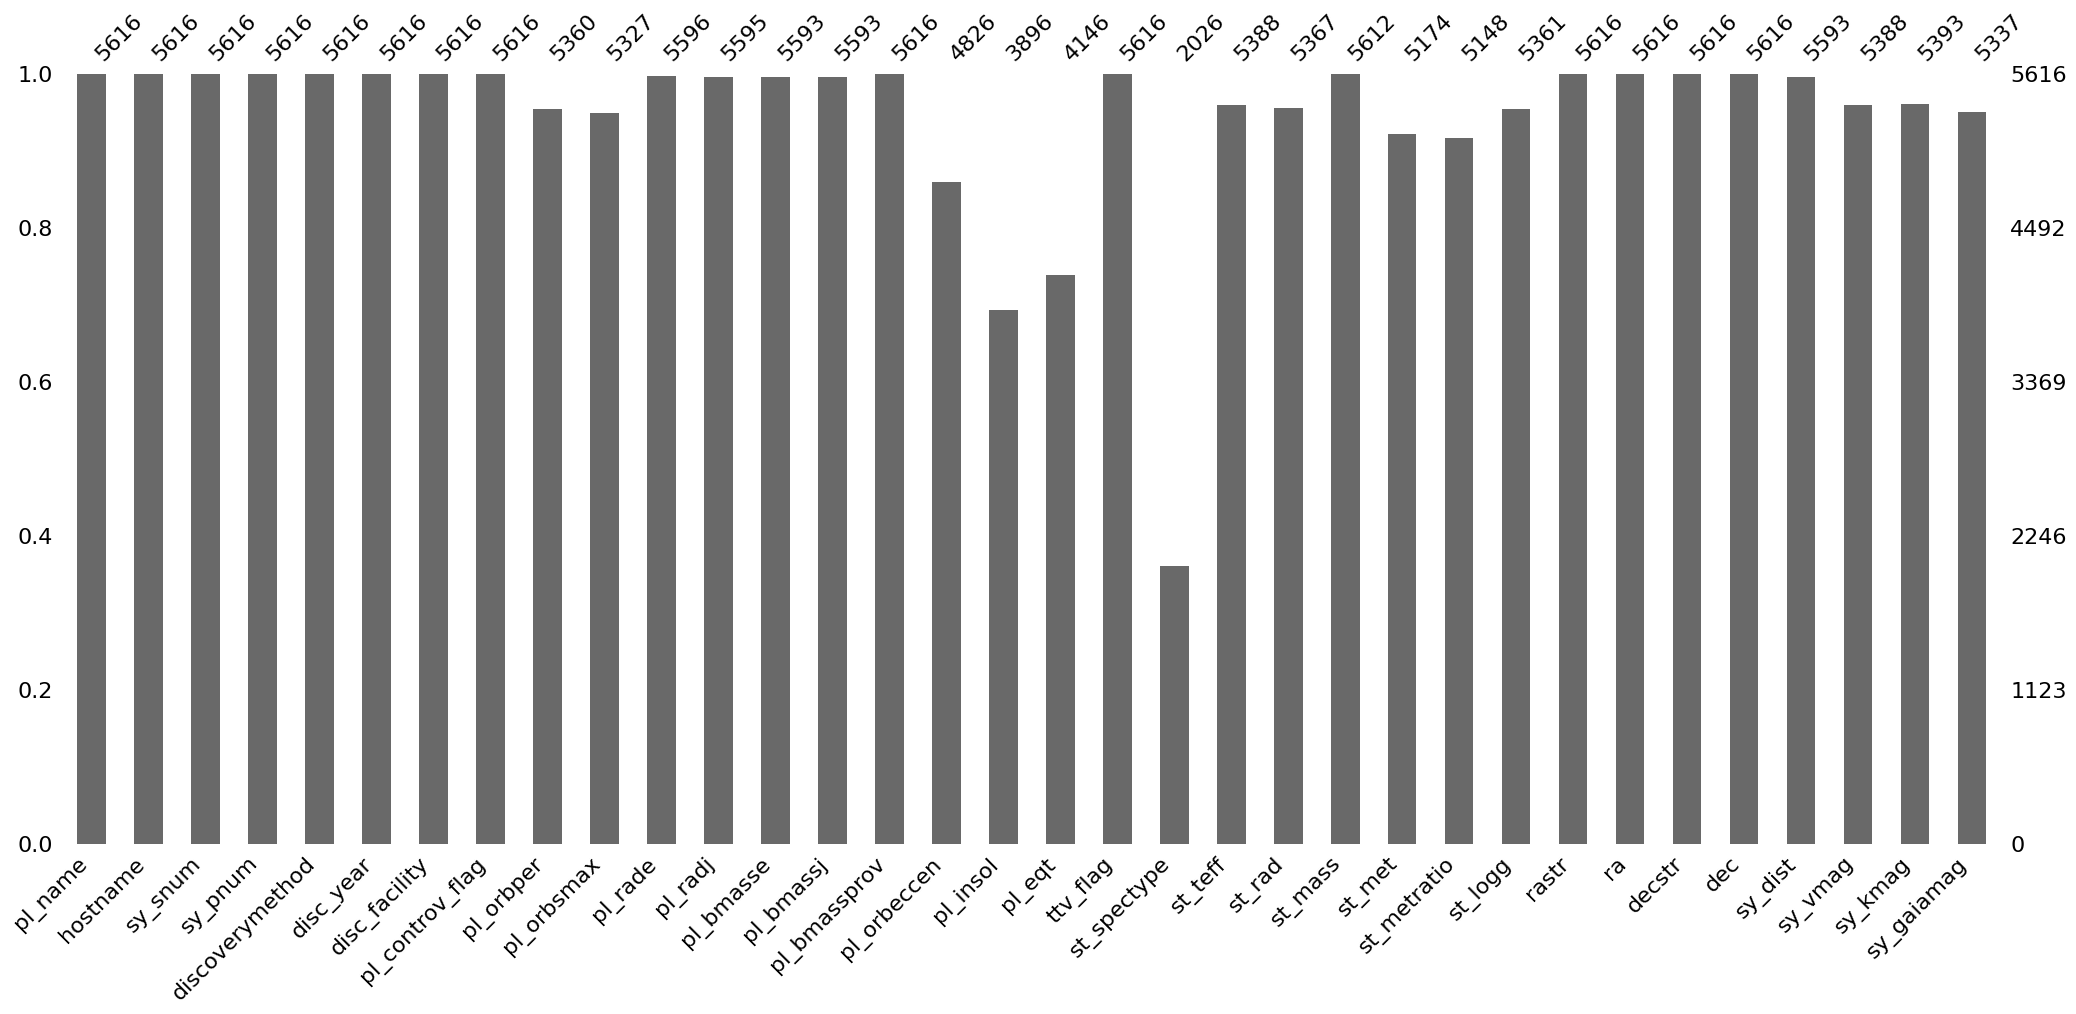

In [ ]:
msno.bar(Data3)

In [ ]:
#probamos imputar valores nulos
Data3_test = Data3.copy()

In [ ]:
Data3_test.isnull().sum()

pl_name               0
hostname              0
sy_snum               0
sy_pnum               0
discoverymethod       0
disc_year             0
disc_facility         0
pl_controv_flag       0
pl_orbper           256
pl_orbsmax          289
pl_rade              20
pl_radj              21
pl_bmasse            23
pl_bmassj            23
pl_bmassprov          0
pl_orbeccen         790
pl_insol           1720
pl_eqt             1470
ttv_flag              0
st_spectype        3590
st_teff             228
st_rad              249
st_mass               4
st_met              442
st_metratio         468
st_logg             255
rastr                 0
ra                    0
decstr                0
dec                   0
sy_dist              23
sy_vmag             228
sy_kmag             223
sy_gaiamag          279
dtype: int64

In [ ]:
# Configura la opción display.max_columns a None para mostrar todas las columnas
pd.set_option('display.max_columns', None)

# Muestra las primeras 15 filas con todas las columnas
print(Data3.head(15))

# Restaura la configuración original después de mostrar el DataFrame
pd.reset_option('display.max_columns')


                         pl_name                   hostname  sy_snum  sy_pnum  \
0                       11 Com b                     11 Com        2        1   
1                       11 UMi b                     11 UMi        1        1   
2                       14 And b                     14 And        1        1   
3                       14 Her b                     14 Her        1        2   
4                     16 Cyg B b                   16 Cyg B        3        1   
5                       17 Sco b                     17 Sco        1        1   
6                       18 Del b                     18 Del        2        1   
7        1RXS J160929.1-210524 b      1RXS J160929.1-210524        1        1   
8                       24 Boo b                     24 Boo        1        1   
9                       24 Sex b                     24 Sex        1        2   
10                      24 Sex c                     24 Sex        1        2   
11                      2M04

lo que haremos para el EDA es:

- borrar la col de st_spectype   ya que contiene mas de 3000 filas NaN

- imputar el dato "desconocido" para la col st_metratio que contiene valores NaN pero menos cantidad (400 aprox)

- imputar las otras col con la media

- guardar todo en un nuevo csv lladamo Data3_test para no tener que hacer la limpieza nuevamente


In [ ]:
Data3_test.isnull().sum()

pl_name               0
hostname              0
sy_snum               0
sy_pnum               0
discoverymethod       0
disc_year             0
disc_facility         0
pl_controv_flag       0
pl_orbper           256
pl_orbsmax          289
pl_rade              20
pl_radj              21
pl_bmasse            23
pl_bmassj            23
pl_bmassprov          0
pl_orbeccen         790
pl_insol           1720
pl_eqt             1470
ttv_flag              0
st_spectype        3590
st_teff             228
st_rad              249
st_mass               4
st_met              442
st_metratio         468
st_logg             255
rastr                 0
ra                    0
decstr                0
dec                   0
sy_dist              23
sy_vmag             228
sy_kmag             223
sy_gaiamag          279
dtype: int64

In [ ]:
Data3_test = Data3_test.drop('st_spectype', axis=1)


In [ ]:
# Obtener el tipo de datos de cada columna
tipos_de_datos = Data3_test.dtypes

nulos_por_col3=Data3_test.isnull().sum()

cantidad_col_con_nul3=nulos_por_col3[nulos_por_col3>0].count()

# Combinar los resultados de nulos_por_col3 y tipos_de_datos en un DataFrame
info_columnas = pd.concat([nulos_por_col3, tipos_de_datos], axis=1)
info_columnas.columns = ['Cantidad de NaN', 'Tipo de dato']

# Ordenar las columnas según la cantidad de NaN de mayor a menor
columnas_con_mas_nulos_y_tipo = info_columnas.sort_values(by='Cantidad de NaN', ascending=False)

# Muestra las columnas con la mayor cantidad de NaN y su tipo de datos
print("Columnas con la mayor cantidad de NaN y su tipo de datos:")
print(columnas_con_mas_nulos_y_tipo.head(20))

Columnas con la mayor cantidad de NaN y su tipo de datos:
             Cantidad de NaN Tipo de dato
pl_insol                1720      float64
pl_eqt                  1470      float64
pl_orbeccen              790      float64
st_metratio              468       object
st_met                   442      float64
pl_orbsmax               289      float64
sy_gaiamag               279      float64
pl_orbper                256      float64
st_logg                  255      float64
st_rad                   249      float64
sy_vmag                  228      float64
st_teff                  228      float64
sy_kmag                  223      float64
pl_bmasse                 23      float64
pl_bmassj                 23      float64
sy_dist                   23      float64
pl_radj                   21      float64
pl_rade                   20      float64
st_mass                    4      float64
dec                        0      float64


In [ ]:
# Reemplazar los valores NaN en la columna 'st_metratio' con 'Desconocido'
Data3_test['st_metratio'].fillna('Desconocido', inplace=True)

In [ ]:
Data3_test.isnull().sum()

pl_name               0
hostname              0
sy_snum               0
sy_pnum               0
discoverymethod       0
disc_year             0
disc_facility         0
pl_controv_flag       0
pl_orbper           256
pl_orbsmax          289
pl_rade              20
pl_radj              21
pl_bmasse            23
pl_bmassj            23
pl_bmassprov          0
pl_orbeccen         790
pl_insol           1720
pl_eqt             1470
ttv_flag              0
st_teff             228
st_rad              249
st_mass               4
st_met              442
st_metratio           0
st_logg             255
rastr                 0
ra                    0
decstr                0
dec                   0
sy_dist              23
sy_vmag             228
sy_kmag             223
sy_gaiamag          279
dtype: int64

<Axes: >

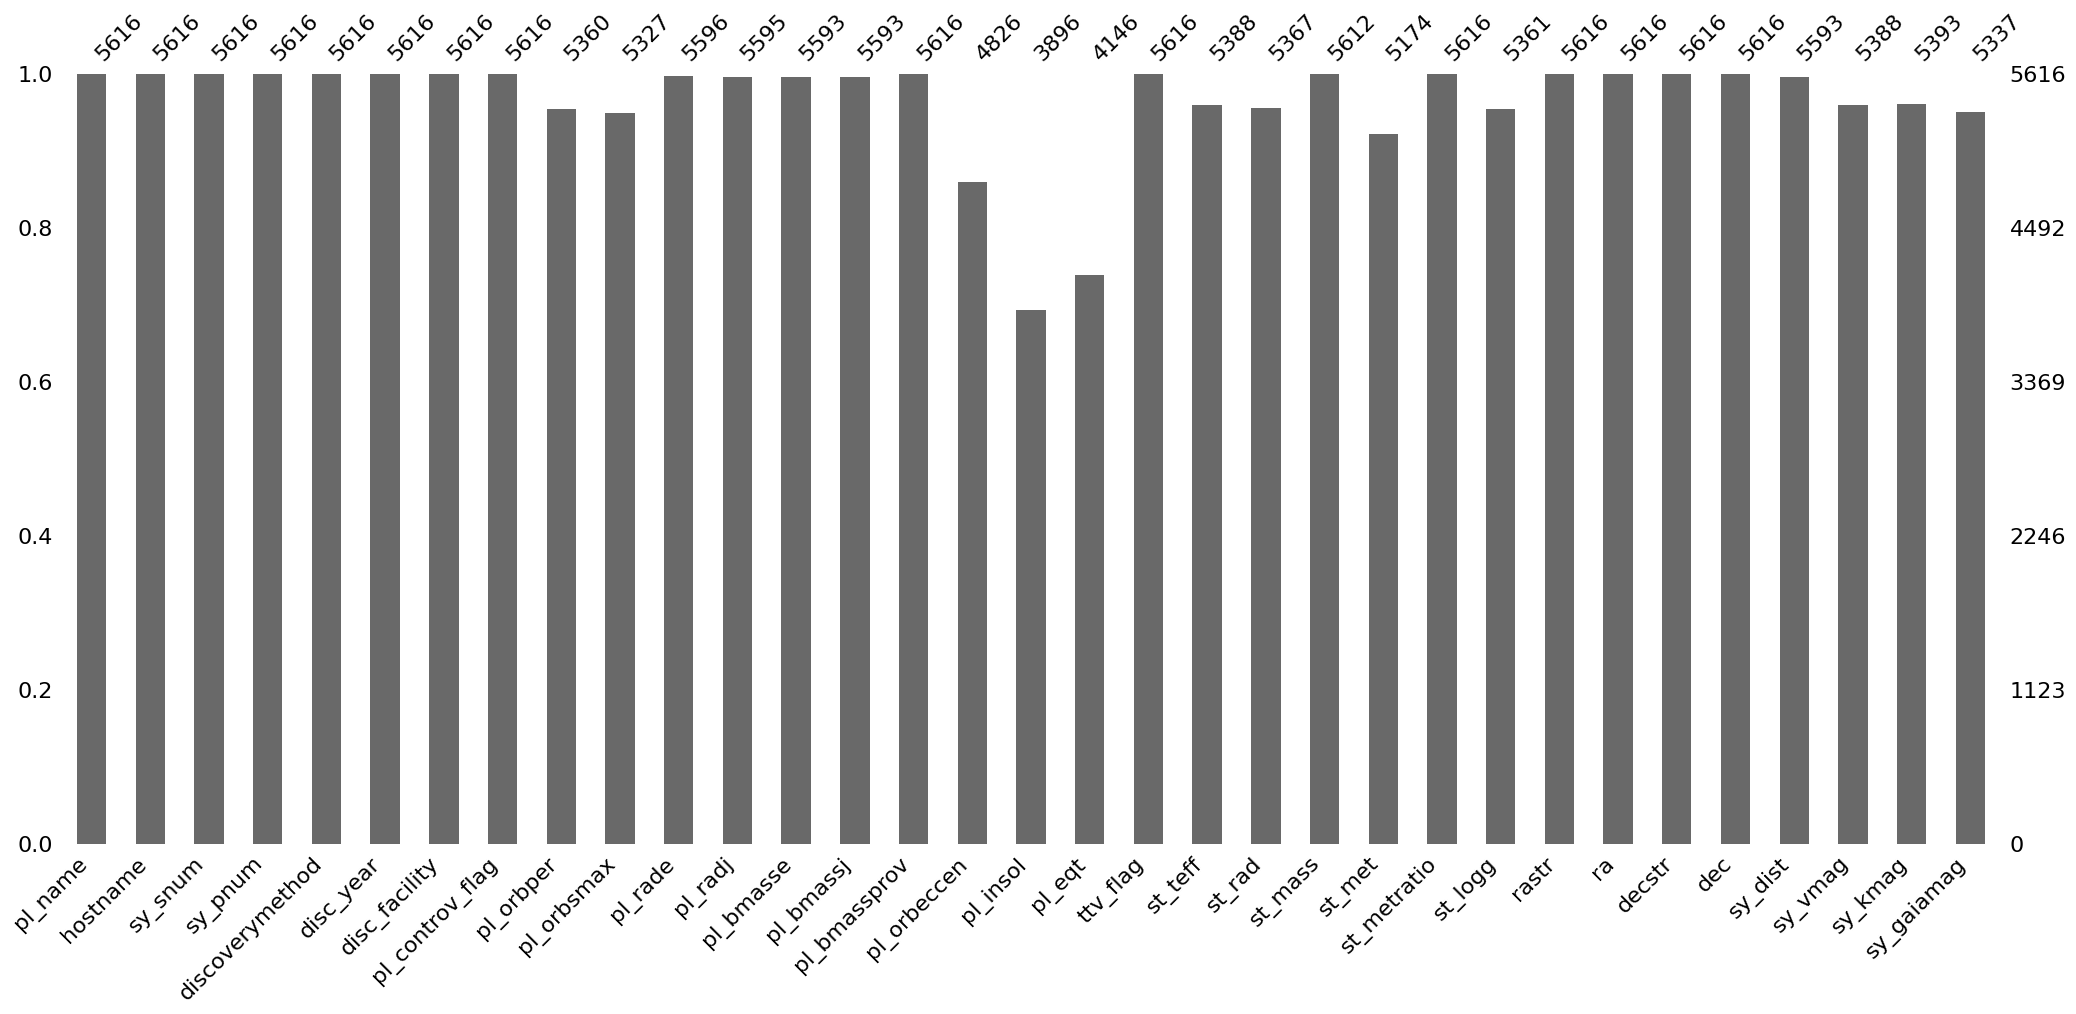

In [ ]:
msno.bar(Data3_test)

In [ ]:
# Crear un DataFrame con los valores NaN por columna
nan_por_columna = Data3_test.isna().sum().reset_index()
nan_por_columna.columns = ['Columna', 'NaN']

# Obtener los tipos de datos de cada columna
tipos_de_datos = Data3_test.dtypes.reset_index()
tipos_de_datos.columns = ['Columna', 'Tipo de dato']

# Concatenar los DataFrames
tabla_info = pd.concat([nan_por_columna, tipos_de_datos['Tipo de dato']], axis=1)

# Imprimir la tabla
print(tabla_info)


            Columna   NaN Tipo de dato
0           pl_name     0       object
1          hostname     0       object
2           sy_snum     0        int64
3           sy_pnum     0        int64
4   discoverymethod     0       object
5         disc_year     0        int64
6     disc_facility     0       object
7   pl_controv_flag     0        int64
8         pl_orbper   256      float64
9        pl_orbsmax   289      float64
10          pl_rade    20      float64
11          pl_radj    21      float64
12        pl_bmasse    23      float64
13        pl_bmassj    23      float64
14     pl_bmassprov     0       object
15      pl_orbeccen   790      float64
16         pl_insol  1720      float64
17           pl_eqt  1470      float64
18         ttv_flag     0        int64
19          st_teff   228      float64
20           st_rad   249      float64
21          st_mass     4      float64
22           st_met   442      float64
23      st_metratio     0       object
24          st_logg   255

In [ ]:
# Imputar los valores faltantes con la media en las columnas numéricas
#Data3_test.fillna(Data3_test.mean(), inplace=True)
# reemplazar con la media
cols_with_nan = Data3_test.columns[Data3_test.isna().any()].tolist()
Data3_test[cols_with_nan] = Data3_test[cols_with_nan].fillna(Data3_test[cols_with_nan].mean())

#Data3_test = Data3_test.fillna(Data3_test.mean())

print(Data3_test.shape)
print(Data3_test.head().round(2))

(5616, 33)
      pl_name  hostname  sy_snum  sy_pnum  discoverymethod  disc_year  \
0    11 Com b    11 Com        2        1  Radial Velocity       2007   
1    11 UMi b    11 UMi        1        1  Radial Velocity       2009   
2    14 And b    14 And        1        1  Radial Velocity       2008   
3    14 Her b    14 Her        1        2  Radial Velocity       2002   
4  16 Cyg B b  16 Cyg B        3        1  Radial Velocity       1996   

                            disc_facility  pl_controv_flag  pl_orbper  \
0                        Xinglong Station                0     323.21   
1  Thueringer Landessternwarte Tautenburg                0     516.22   
2       Okayama Astrophysical Observatory                0     186.76   
3                  W. M. Keck Observatory                0    1765.04   
4                  Multiple Observatories                0     798.50   

   pl_orbsmax  ...  st_metratio  st_logg         rastr      ra         decstr  \
0        1.18  ...       [Fe/H

<Axes: >

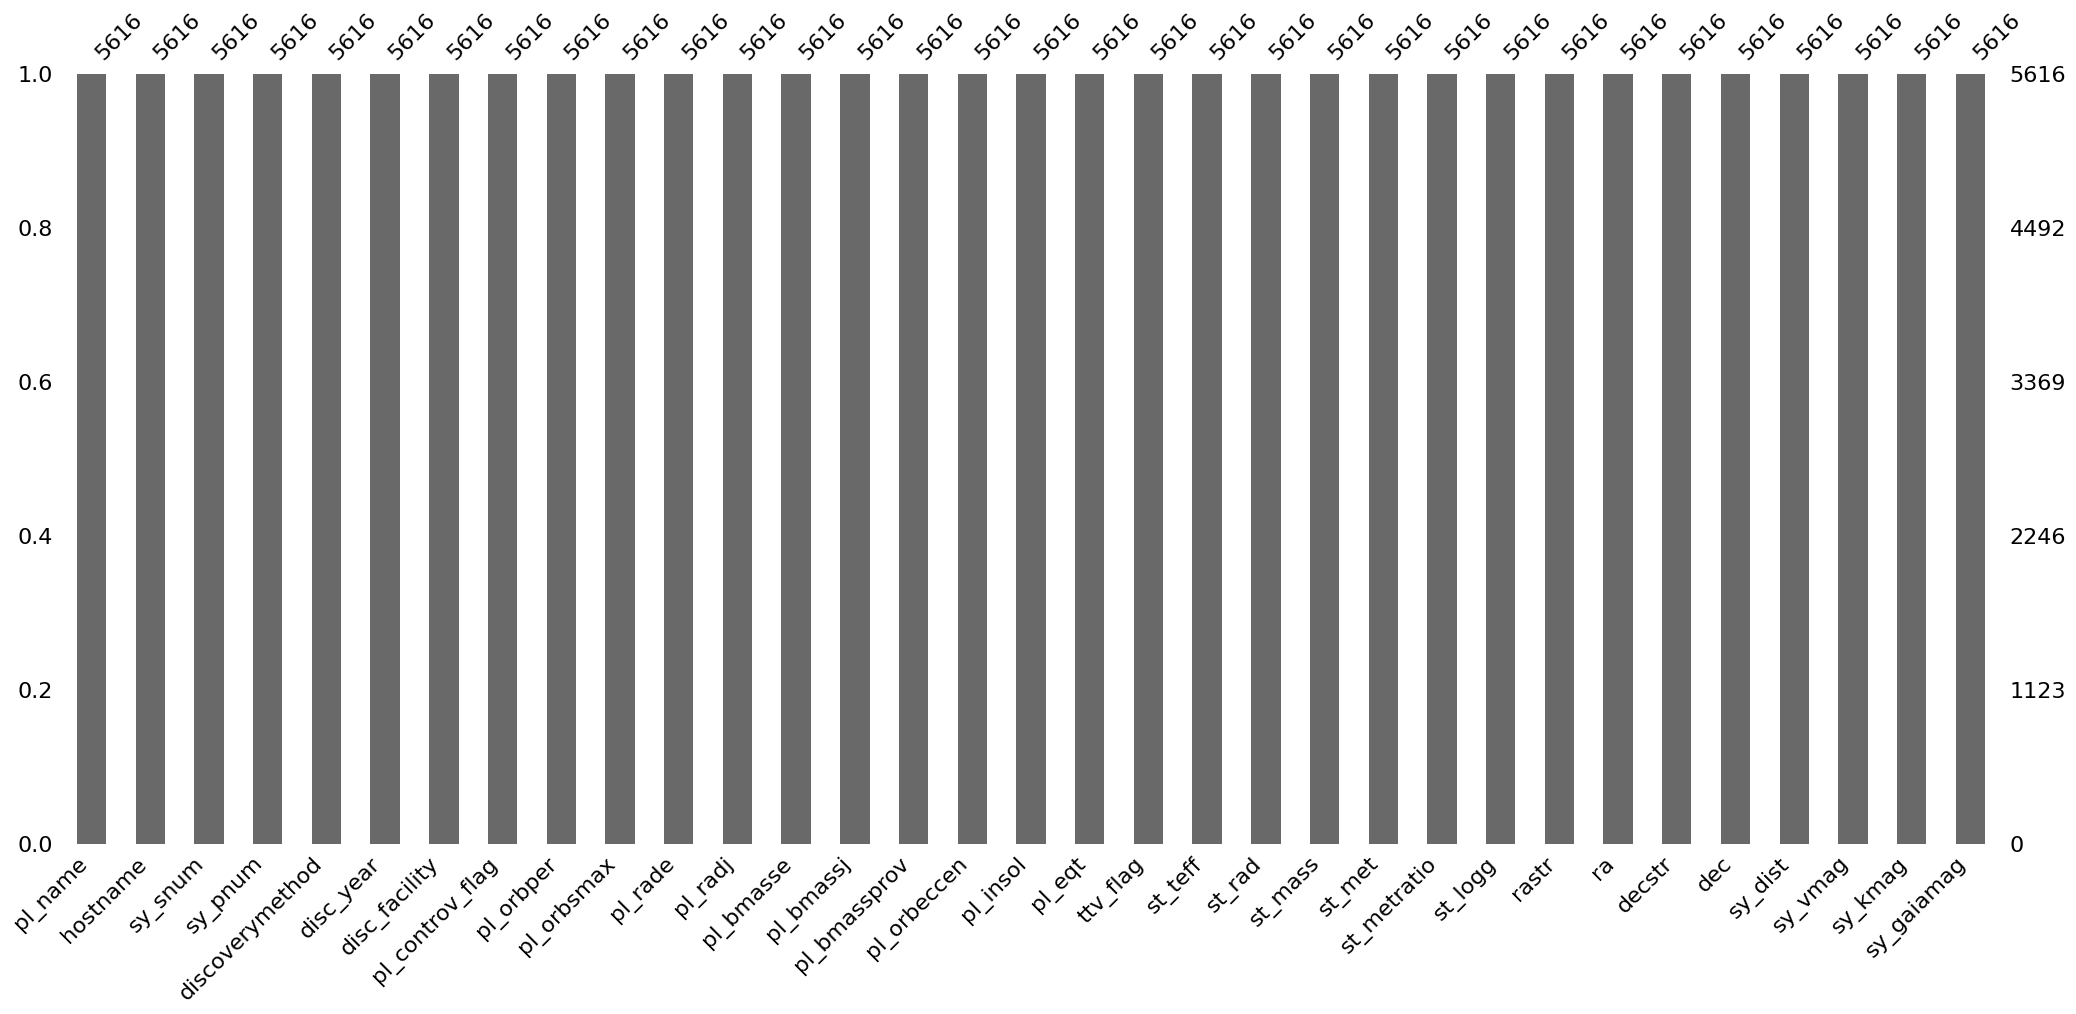

In [ ]:
msno.bar(Data3_test)

In [ ]:
Data3_test.head(15)

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbsmax,...,st_metratio,st_logg,rastr,ra,decstr,dec,sy_dist,sy_vmag,sy_kmag,sy_gaiamag
0,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,0,323.21000,1.178,...,[Fe/H],2.450000,12h20m42.91s,185.178779,+17d47m35.71s,17.793252,93.184600,4.723070,2.282000,4.440380
1,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,0,516.21997,1.530,...,[Fe/H],1.930000,15h17m05.90s,229.274595,+71d49m26.19s,71.823943,125.321000,5.013000,1.939000,4.562160
2,14 And b,14 And,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,0,186.76000,0.775,...,[Fe/H],2.550000,23h31m17.80s,352.824150,+39d14m09.01s,39.235837,75.439200,5.231330,2.331000,4.917810
3,14 Her b,14 Her,1,2,Radial Velocity,2002,W. M. Keck Observatory,0,1765.03890,2.774,...,[Fe/H],4.450000,16h10m24.50s,242.602101,+43d48m58.90s,43.816362,17.932300,6.619350,4.714000,6.383000
4,16 Cyg B b,16 Cyg B,3,1,Radial Velocity,1996,Multiple Observatories,0,798.50000,1.660,...,[Fe/H],4.360000,19h41m51.75s,295.465642,+50d31m00.57s,50.516824,21.139700,6.215000,4.651000,6.064280
5,17 Sco b,17 Sco,1,1,Radial Velocity,2020,Lick Observatory,0,578.38000,1.450,...,[Fe/H],1.700000,16h13m50.90s,243.462087,-11d50m16.05s,-11.837791,124.953000,5.226060,2.094000,4.754290
6,18 Del b,18 Del,2,1,Radial Velocity,2008,Okayama Astrophysical Observatory,0,982.85000,2.476,...,[Fe/H],2.870000,20h58m25.88s,314.607838,+10d50m20.90s,10.839138,76.222000,5.510480,3.366000,5.274760
7,1RXS J160929.1-210524 b,1RXS J160929.1-210524,1,1,Imaging,2008,Gemini Observatory,0,79799.03840,330.000,...,Desconocido,4.000000,16h09m30.30s,242.376234,-21d04m59.31s,-21.083140,139.135000,12.618000,8.916000,12.057200
8,24 Boo b,24 Boo,1,1,Radial Velocity,2018,Okayama Astrophysical Observatory,0,30.33000,0.194,...,[Fe/H],2.280000,14h28m37.33s,217.155524,+49d50m40.74s,49.844649,95.986300,5.590000,3.159000,5.333900
9,24 Sex b,24 Sex,1,2,Radial Velocity,2010,Lick Observatory,0,452.80000,1.333,...,[Fe/H],3.500000,10h23m28.44s,155.868487,-00d54m08.64s,-0.902400,72.069100,6.453500,4.285000,6.203740


In [ ]:
Data3_test.isnull().sum()

pl_name            0
hostname           0
sy_snum            0
sy_pnum            0
discoverymethod    0
disc_year          0
disc_facility      0
pl_controv_flag    0
pl_orbper          0
pl_orbsmax         0
pl_rade            0
pl_radj            0
pl_bmasse          0
pl_bmassj          0
pl_bmassprov       0
pl_orbeccen        0
pl_insol           0
pl_eqt             0
ttv_flag           0
st_teff            0
st_rad             0
st_mass            0
st_met             0
st_metratio        0
st_logg            0
rastr              0
ra                 0
decstr             0
dec                0
sy_dist            0
sy_vmag            0
sy_kmag            0
sy_gaiamag         0
dtype: int64

en este momento ya tenemos el dataset listo sin datos NaN para seguir trabajando. seguiremos con el nombre Data3_test y lo guardaremos para mayor comodidad

In [ ]:
# Guardar el DataFrame en un archivo CSV
#Data3_test.to_csv('/content/gdrive/MyDrive/coderData/dataset_PF/Data3_test.csv', index=False)


In [ ]:
### Load relevant packages
import pandas                  as pd
from   scipy import stats
import numpy                   as np


import matplotlib.pyplot       as plt
import seaborn                 as sns
import matplotlib              as mpl

In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
os.chdir("/content/gdrive/MyDrive/coderData/dataset_PF/")

In [ ]:
# Configurando matplotlib
mpl.rcParams['axes.titleweight'] = 'bold'
#mpl.rcParams['axes.titlelocation'] = 'left'
mpl.rcParams['axes.titlecolor'] = 'blue'#'firebrick'
mpl.rcParams['axes.labelcolor'] = 'blue'
mpl.rcParams['axes.labelsize'] = '10'
mpl.rcParams['axes.labelweight'] = 'light'
mpl.rcParams['axes.linewidth'] = '1'
mpl.rcParams['grid.color'] = 'black'
mpl.rcParams['grid.linestyle'] = '-.'
mpl.rcParams['grid.linewidth'] = '2'

In [ ]:
#https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use('fast')

In [ ]:
# Cargar el DataFrame desde el archivo CSV
df = pd.read_csv('/content/gdrive/MyDrive/coderData/dataset_PF/Data3_test.csv')


In [ ]:
df.shape

(5616, 33)

In [ ]:
df.isnull().sum()

pl_name            0
hostname           0
sy_snum            0
sy_pnum            0
discoverymethod    0
disc_year          0
disc_facility      0
pl_controv_flag    0
pl_orbper          0
pl_orbsmax         0
pl_rade            0
pl_radj            0
pl_bmasse          0
pl_bmassj          0
pl_bmassprov       0
pl_orbeccen        0
pl_insol           0
pl_eqt             0
ttv_flag           0
st_teff            0
st_rad             0
st_mass            0
st_met             0
st_metratio        0
st_logg            0
rastr              0
ra                 0
decstr             0
dec                0
sy_dist            0
sy_vmag            0
sy_kmag            0
sy_gaiamag         0
dtype: int64

In [ ]:
# Configura la opción display.max_columns a None para mostrar todas las columnas
pd.set_option('display.max_columns', None)

# Muestra las primeras 15 filas con todas las columnas
print(df.head(15))

# Restaura la configuración original después de mostrar el DataFrame
pd.reset_option('display.max_columns')


                         pl_name                   hostname  sy_snum  sy_pnum  \
0                       11 Com b                     11 Com        2        1   
1                       11 UMi b                     11 UMi        1        1   
2                       14 And b                     14 And        1        1   
3                       14 Her b                     14 Her        1        2   
4                     16 Cyg B b                   16 Cyg B        3        1   
5                       17 Sco b                     17 Sco        1        1   
6                       18 Del b                     18 Del        2        1   
7        1RXS J160929.1-210524 b      1RXS J160929.1-210524        1        1   
8                       24 Boo b                     24 Boo        1        1   
9                       24 Sex b                     24 Sex        1        2   
10                      24 Sex c                     24 Sex        1        2   
11                      2M04

#Variables de interes

tenemos que tener en cuenta las siguientes variables principalmente para determinar si un planeta es habitable o no

*  el radio del planeta tiene que estar entre 0.5 y 1.6. la muestra optimista va hasta 2.5 de radio

*  la masa minima del planeta tiene que estar entre 0.1 y 3 veces la masa terrestre. la muestra optimista va hasta 10 veces la masa terrestre

*  el flux (el flujo estelar) deberia ir desde 0.25 hasta 1.5 aprox, pero este depende de la temperatura estelar.

*  por ultimo, la temperatura estelar en promedio debe ir entre 3k y 7k (K) aproximadamente

estos datos se encuentran en: https://phl.upr.edu/hwc#h.ypl6svo04iii


Las variables que considero utiles para responder este objetivo son:

 - pl_rade: Planet Radius [Earth Radius]   el radio en base al planeta tierra
 - pl_bmasse: Planet Mass or Mass*sin(i) [Earth Mass]  la masa en base al planeta tierra
 - pl_insol: Insolation Flux [Earth Flux] el flujo estelar donde puede haber agua y por consecuencia vida
 - st_teff: Stellar Effective Temperature la temperatura superficial estimada en Kelvins, suponiendo una atmosfera similar a la tierra



#exploracion inicial.

como se distribuye la variable pl_rade

<Axes: xlabel='pl_rade', ylabel='Count'>

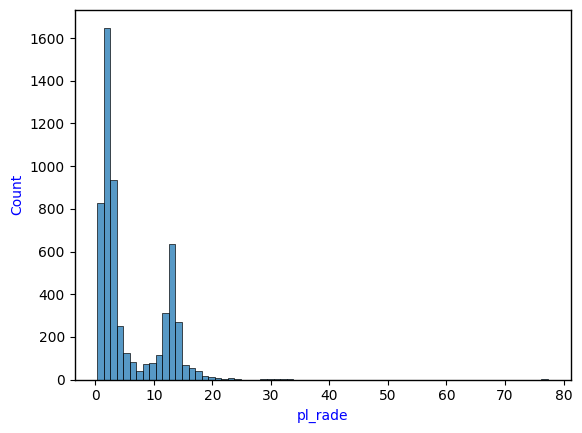

In [ ]:
sns.histplot(df, x = "pl_rade")

en este primer grafico se observa que la mayoria de los planetas se ubican en los rangos entre 0 y 10 veces el radio de la tierra

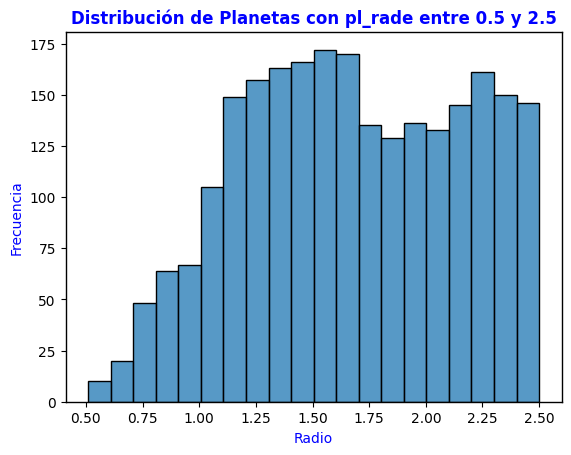

In [ ]:
import seaborn as sns

# Filtrar los datos para incluir solo los planetas con pl_rade entre 0.5 y 2.5
filtered_df = df[(df['pl_rade'] >= 0.5) & (df['pl_rade'] <= 2.5)]

# Crear el histograma
sns.histplot(filtered_df['pl_rade'], bins=20)  # Puedes ajustar el número de bins según lo desees
plt.title('Distribución de Planetas con pl_rade entre 0.5 y 2.5')
plt.xlabel('Radio')
plt.ylabel('Frecuencia')

plt.show()


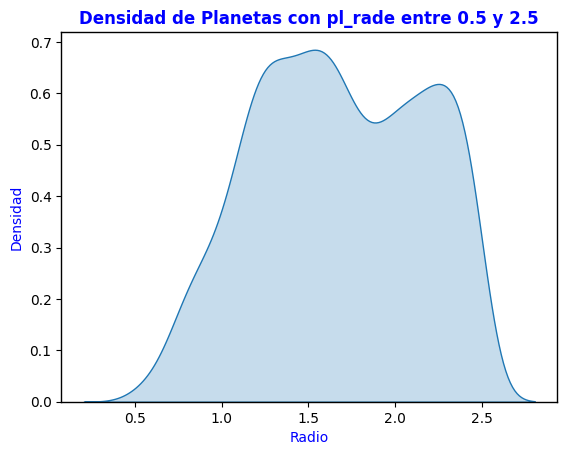

In [ ]:

# Filtrar los datos para incluir solo los planetas con pl_rade entre 0.5 y 2.5
filtered_df = df[(df['pl_rade'] >= 0.5) & (df['pl_rade'] <= 2.5)]

# Crear el gráfico de densidad
sns.kdeplot(filtered_df['pl_rade'], fill=True)
plt.title('Densidad de Planetas con pl_rade entre 0.5 y 2.5')
plt.xlabel('Radio')
plt.ylabel('Densidad')

plt.show()


en estas dos graficas podemos observar mejor como se distribuyen los planetas con el radio entre 0 y 2.5 el cual es el adecuado para ser habitable. ahora veamos como se relaciona con la masa del planeta

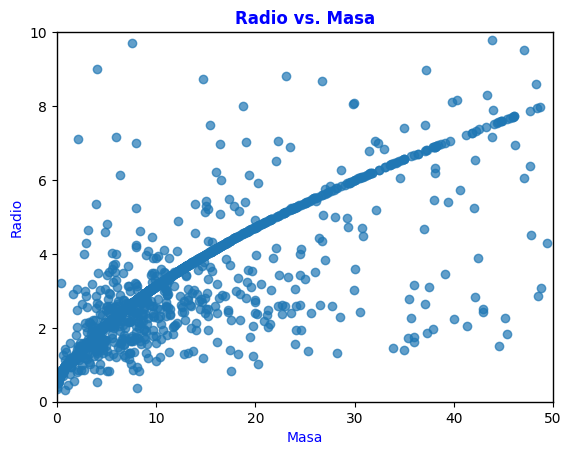

In [ ]:

# Crear la gráfica de dispersión
fig, ax = plt.subplots()
ax.scatter(df['pl_bmasse'],df['pl_rade'], alpha=0.7)
ax.set_title('Radio vs. Masa')
ax.set_xlabel('Masa')
ax.set_ylabel('Radio')

# Establecer límites personalizados en los ejes x e y para hacer zoom
ax.set_xlim(0, 50)  # Límites en el eje x (masa)
ax.set_ylim(0, 10)  # Límites en el eje y (radio)

plt.show()


se puede observar que hay una correlacion directa, a mayor masa es mayor el radio del planeta. por ende lo que nos interesan son los que tengan un radio y masa relativamente pequeño. para eso empezaremos a filtrar del dataset los que cumplan las condiciones.

In [ ]:
# Filtra el DataFrame para obtener solo los planetas con radio entre 0.5 y 2.5
habitables_df = df[(df['pl_rade'] >= 0.5) & (df['pl_rade'] <= 2.5)]

# Cuenta la cantidad de filas en el DataFrame filtrado
cantidad_habitables = habitables_df.shape[0]

print("Cantidad de planetas habitables según el radio:", cantidad_habitables)


Cantidad de planetas habitables según el radio: 2426


por lo que podemos ver tanto en el grafico como en el filtro del df, existen alrededor de 2400 planetas que cumplen la condicion del radio

In [ ]:
# Filtrar los planetas habitables según la masa
planetas_habitables_masa = habitables_df[(habitables_df['pl_bmasse'] >= 0.09) & (habitables_df['pl_bmasse'] <= 10)]

# Calcular la cantidad total de planetas habitables según la masa
cantidad_total_masa = len(planetas_habitables_masa)

print("La cantidad total de planetas habitables según la masa es:", cantidad_total_masa)


La cantidad total de planetas habitables según la masa es: 2326


Hacemos lo mismo con la condicion de la masa , y a su vez despues filtramos por flujo estelar y temperatura

In [ ]:
# Filtrar los planetas habitables según el flujo de insolación
planetas_habitables_insol = planetas_habitables_masa[(planetas_habitables_masa['pl_insol'] >= 0.2) & (planetas_habitables_masa['pl_insol'] <= 1.7)]

# Calcular la cantidad total de planetas habitables según el flujo de insolación
cantidad_total_insol = len(planetas_habitables_insol)

print("La cantidad total de planetas habitables según el flujo estelar es:", cantidad_total_insol)


La cantidad total de planetas habitables según el flujo estelar es: 58


In [ ]:
# Filtrar los planetas habitables según la temperatura efectiva de la estrella
planetas_habitables_final = planetas_habitables_insol[(planetas_habitables_insol['st_teff'] >= 2900) & (planetas_habitables_insol['st_teff'] <= 7000)]

# Calcular la cantidad total de planetas habitables que cumplen con todas las condiciones
cantidad_total_final = len(planetas_habitables_final)

print("La cantidad total de planetas habitables que cumplen con todas las condiciones es:", cantidad_total_final)


La cantidad total de planetas habitables que cumplen con todas las condiciones es: 54


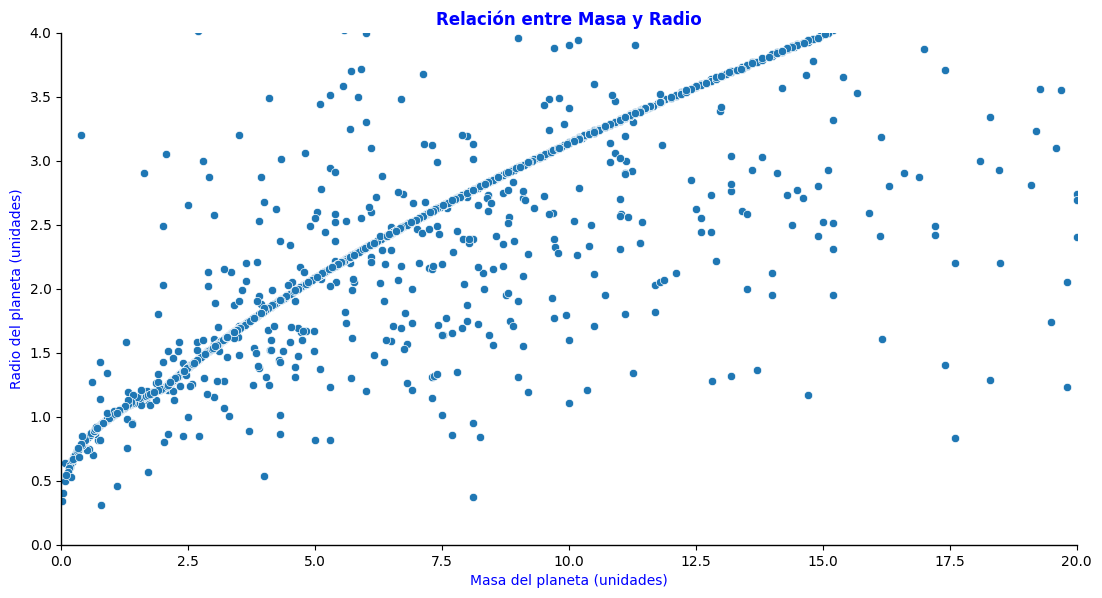

In [ ]:

# Crear el gráfico de dispersión
g = sns.relplot(
    data=df,
    x="pl_bmasse", y="pl_rade", kind='scatter')

# Ajustar los límites del eje x y del eje y
g.axes[0, 0].set_xlim(0, 20)  # Límites para la masa
g.axes[0, 0].set_ylim(0, 4)   # Límites para el radio

# Establecer etiquetas y título
g.set(xlabel='Masa del planeta (unidades)', ylabel='Radio del planeta (unidades)', title='Relación entre Masa y Radio')
g.fig.set_figwidth(12)
g.fig.set_figheight(6)

# Mostrar el gráfico
plt.show()


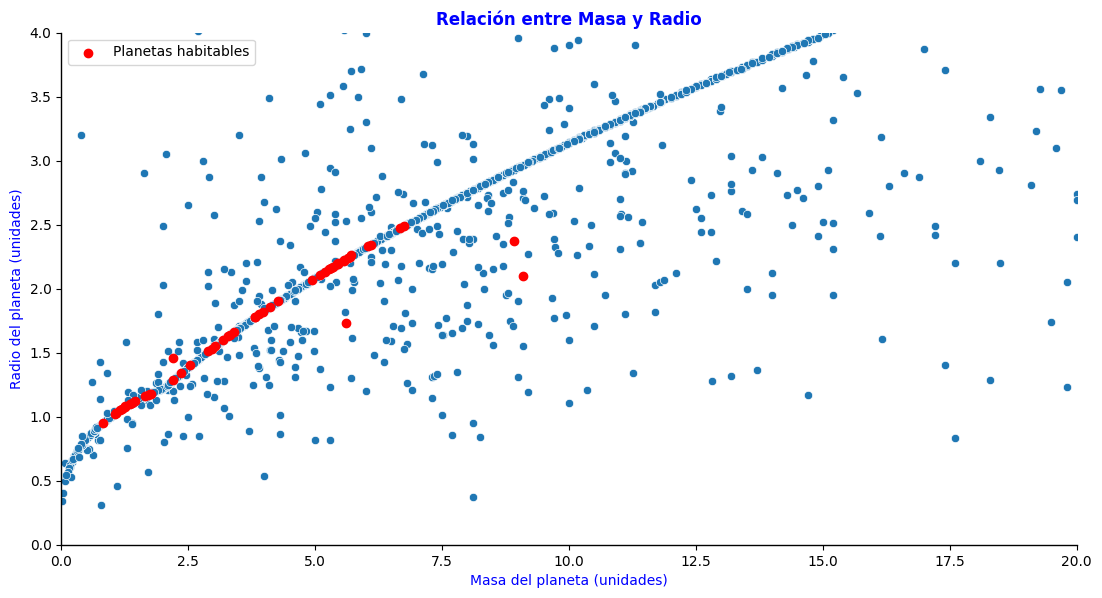

In [ ]:

# Crear el gráfico de dispersión
g = sns.relplot(
    data=df,
    x="pl_bmasse", y="pl_rade", kind='scatter')

# Ajustar los límites del eje x y del eje y
g.axes[0, 0].set_xlim(0, 20)  # Límites para la masa
g.axes[0, 0].set_ylim(0, 4)   # Límites para el radio

# Establecer etiquetas y título
g.set(xlabel='Masa del planeta (unidades)', ylabel='Radio del planeta (unidades)', title='Relación entre Masa y Radio')
g.fig.set_figwidth(12)
g.fig.set_figheight(6)

# Graficar los planetas habitables que cumplen con todas las condiciones como puntos
plt.scatter(planetas_habitables_final['pl_bmasse'], planetas_habitables_final['pl_rade'], color='red', marker='o', label='Planetas habitables')

# Mostrar el gráfico
plt.legend()
plt.show()


en este grafico en rojo podemos ubicar cuales serian los planetas habitables que cumplen todas las condiciones

In [ ]:
# Encontrar el planeta habitable más cercano
planeta_mas_cercano = planetas_habitables_final.loc[planetas_habitables_final['sy_dist'].idxmin()]['pl_name']

# Encontrar el planeta habitable más lejano
planeta_mas_lejano = planetas_habitables_final.loc[planetas_habitables_final['sy_dist'].idxmax()]['pl_name']

# Imprimir los resultados
print("El planeta habitable más cercano es:", planeta_mas_cercano)
print("El planeta habitable más lejano es:", planeta_mas_lejano)


El planeta habitable más cercano es: Proxima Cen b
El planeta habitable más lejano es: Kepler-1606 b


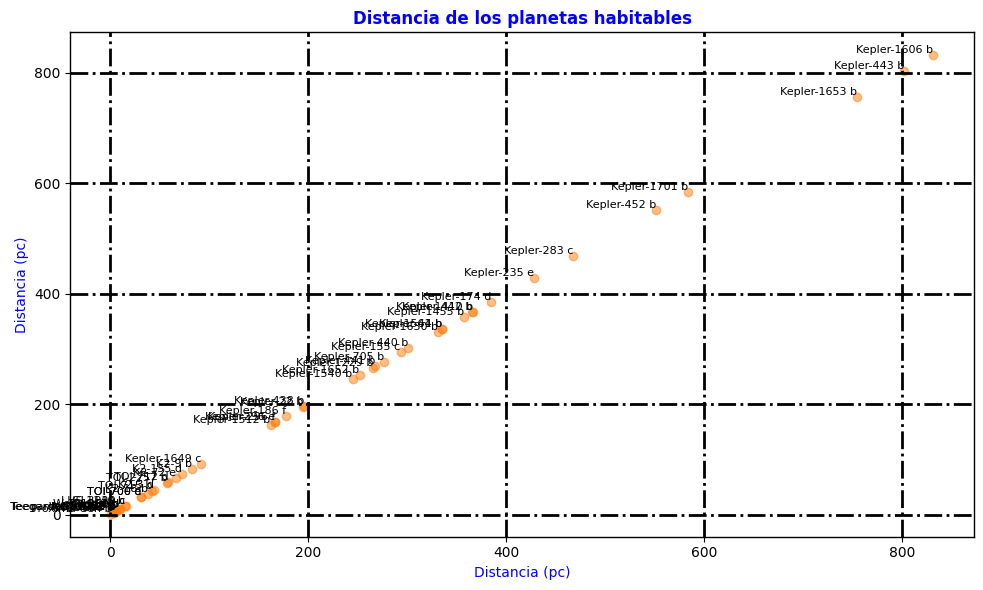

In [ ]:

# Filtrar los planetas habitables según la temperatura efectiva de la estrella
planetas_habitables_final = planetas_habitables_insol[(planetas_habitables_insol['st_teff'] >= 2900) & (planetas_habitables_insol['st_teff'] <= 7000)]

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(planetas_habitables_final['sy_dist'], planetas_habitables_final['sy_dist'], alpha=0)  # Crear un gráfico vacío solo para establecer los límites de los ejes
plt.scatter(planetas_habitables_final['sy_dist'], planetas_habitables_final['sy_dist'], alpha=0.5)  # Graficar la distancia en ambos ejes
plt.xlabel('Distancia (pc)')
plt.ylabel('Distancia (pc)')
plt.title('Distancia de los planetas habitables')

# Agregar etiquetas de texto para los nombres de los planetas habitables
for i, txt in enumerate(planetas_habitables_final['pl_name']):
    plt.text(planetas_habitables_final['sy_dist'].iloc[i], planetas_habitables_final['sy_dist'].iloc[i], txt, fontsize=8, ha='right', va='bottom')

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()


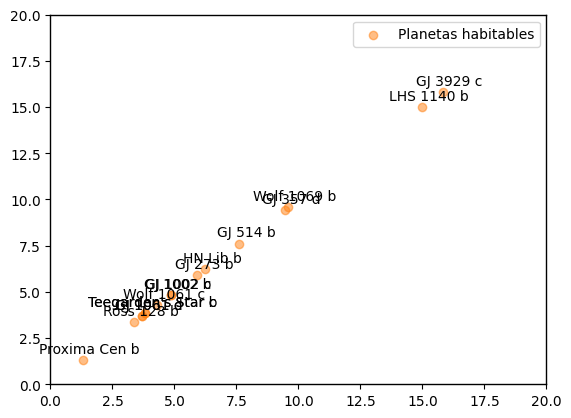

In [ ]:
import matplotlib.pyplot as plt

# Filtrar los planetas habitables según la temperatura efectiva de la estrella
planetas_habitables_final = planetas_habitables_insol[(planetas_habitables_insol['st_teff'] >= 2900) & (planetas_habitables_insol['st_teff'] <= 7000)]

# Crear el gráfico de dispersión
plt.scatter(planetas_habitables_final['sy_dist'], planetas_habitables_final['sy_dist'], alpha=0)  # Crear un gráfico vacío solo para establecer los límites de los ejes
plt.scatter(planetas_habitables_final['sy_dist'], planetas_habitables_final['sy_dist'], alpha=0.5, label='Planetas habitables')  # Graficar la distancia en ambos ejes

# Establecer límites de los ejes para enfocarse en la región cercana a 0
plt.xlim(0, 20)  # Ajustar los límites del eje x
plt.ylim(0, 20)  # Ajustar los límites del eje y

# Anotar el nombre de cada planeta en la gráfica
for i, row in planetas_habitables_final.iterrows():
    plt.annotate(row['pl_name'], (row['sy_dist'], row['sy_dist']), textcoords="offset points", xytext=(5,5), ha='center')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


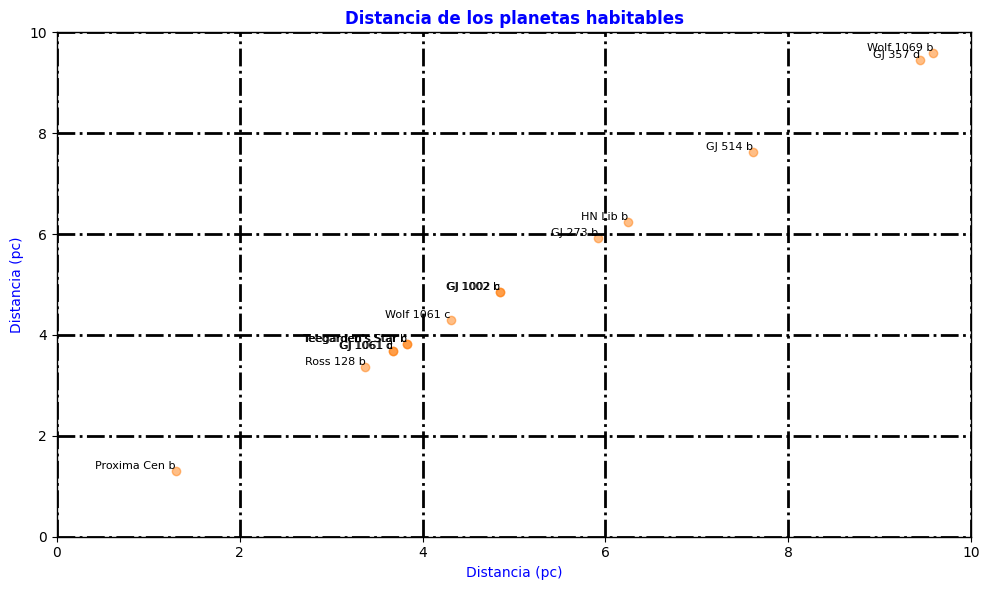

In [ ]:
# Filtrar los planetas habitables según la temperatura efectiva de la estrella
planetas_habitables_final = planetas_habitables_insol[(planetas_habitables_insol['st_teff'] >= 2900) & (planetas_habitables_insol['st_teff'] <= 7000)]

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(planetas_habitables_final['sy_dist'], planetas_habitables_final['sy_dist'], alpha=0)  # Crear un gráfico vacío solo para establecer los límites de los ejes
plt.scatter(planetas_habitables_final['sy_dist'], planetas_habitables_final['sy_dist'], alpha=0.5)  # Graficar la distancia en ambos ejes
plt.xlabel('Distancia (pc)')
plt.ylabel('Distancia (pc)')
plt.title('Distancia de los planetas habitables')

# Agregar etiquetas de texto para los nombres de los planetas habitables
for i, txt in enumerate(planetas_habitables_final['pl_name']):
    plt.annotate(txt, (planetas_habitables_final['sy_dist'].iloc[i], planetas_habitables_final['sy_dist'].iloc[i]), fontsize=8, ha='right', va='bottom')

# Limitar los ejes x y y entre 0 y 20
plt.xlim(0, 10)
plt.ylim(0, 10)

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Ordenar el DataFrame por la columna de distancia
planetas_cercanos = planetas_habitables_final.sort_values(by='sy_dist')

# Seleccionar los primeros 10 registros (los más cercanos)
top_10_cercanos = planetas_cercanos.head(10)

# Imprimir el top 10 de los planetas más cercanos
print("Top 10 de los planetas más cercanos:")
print(top_10_cercanos[['pl_name', 'sy_dist']])


Top 10 de los planetas más cercanos:
                 pl_name   sy_dist
4950       Proxima Cen b  1.301190
4964          Ross 128 b  3.374540
183            GJ 1061 c  3.672780
184            GJ 1061 d  3.672780
5344  Teegarden's Star c  3.830780
5343  Teegarden's Star b  3.830780
5552         Wolf 1061 c  4.305920
180            GJ 1002 b  4.848670
181            GJ 1002 c  4.848670
211             GJ 273 b  5.921535


podemos ver que Proxima Cen b es el mejor candidato en cuanto a condiciones y distancia, arriba se muestra el top 10 de los planetas mas cercanos teoricamente habitables